

### 1. Project Objectives and Problem Statements

**PO1 | PS1: Segmentation of Airline Data using Supervised Machine Learning Algorithms**
- **Objective:** The primary objective is to use supervised machine learning algorithms to segment airline data. This involves categorizing passengers into different groups based on their characteristics and behaviors.

**PO2 | PS2: Implement the random forest algorithm to enhance prediction accuracy compared to the decision tree. Assess random forest performance in terms of accuracy and computational resources. Apply XGBoost algorithm to further improve prediction accuracy as an ensemble learning technique. Compare XGBoost performance with decision tree and random forest models.**
- **Objective:** This objective focuses on implementing and evaluating the random forest algorithm to achieve better prediction accuracy than a decision tree. Additionally, XGBoost will be applied as an ensemble learning technique to further enhance accuracy. The aim is to compare the performance of these models in terms of accuracy and computational resources.

**PO3 | PS3: Evaluate decision tree, random forest, and XGBoost models based on metrics like accuracy, precision, recall, F1-score, execution time, and memory usage to determine the most suitable model for customer segmentation and prediction.**
- **Objective:** This objective involves a comprehensive evaluation of decision tree, random forest, and XGBoost models using various metrics including accuracy, precision, recall, F1-score, execution time, and memory usage. The goal is to identify the most effective model for customer segmentation and prediction based on these criteria.

### 2. Description of Data

Data Description

Data Source:
 Obtained from Kaggle.

Data Shape: 103,904 rows × 25 columns.

Description of Variables

Index Variable: ID

Categorical Variables:

Nominal Categories:

Gender

Customer Type

Type of Travel

Class

Ordinal Categories:

Satisfaction

Inflight wifi service

Departure/Arrival time convenience

Ease of Online booking

Gate location

Food and drink

Online boarding

Seat comfort

Inflight entertainment

On-board service

Leg room service

Baggage handling

Check-in service

Inflight service

Cleanliness

Non-Categorical Variables:

Age

Flight distance

Departure Delay in Minutes

Arrival Delay in Minutes

Descriptive Statistics of Non-Categorical Variables

Measures of Central Tendency:

Age: Mean = 39.38

Flight distance: Mean = 1189.33

Departure Delay in Minutes: Mean = 14.75

Arrival Delay in Minutes: Mean = 15.18

Measures of Dispersion:

Age: Standard Deviation = 15.11

Flight distance: Standard Deviation = 997.30

Departure Delay in Minutes: Standard Deviation = 38.12

Arrival Delay in Minutes: Standard Deviation = 38.70

### 3. Data Pre-Processing

**Missing Data Treatment:**
- The variable "Arrival Delay in Minutes" has 310 missing values, which may require imputation or handling during analysis.

**Numerical Encoding of Categorical Variables:**
- Categorical variables were encoded using an Ordinal Encoder to convert them into a numerical format suitable for machine learning algorithms.

**Outlier Treatment:**
- Outliers in the data were identified and addressed using Min-Max Scaler normalization to ensure consistent scaling across features.

**Data Transformation and Scaling:**
- Non-categorical variables underwent Min-Max Scaling to normalize their values and bring them within a comparable range.

**Pre-Processed Dataset:**
- After encoding categorical variables and normalizing non-categorical variables, the pre-processed dataset was created by merging these subsets for further analysis.

### 4. Findings from Supervised Learning Models


**Random Forest Report Summary:**
- Random forest demonstrated improved accuracy over the decision tree but required moderate computational resources due to its ensemble nature.

**XGBoost Report Summary:**
- XGBoost showed comparable performance to random forest while being more computationally efficient, albeit with slightly lower accuracy.

### 5. Managerial Implications

**Model Selection:**
- Decision Tree: Suitable for balanced performance and interpretability, ideal for scenarios with limited computational resources.
- Random Forest or XGBoost: Preferable for higher accuracy, considering sufficient computational capabilities.

**Customer Segmentation:**
- Decision Tree: Provides straightforward insights into customer segmentation.
- Random Forest or XGBoost: Enables more nuanced segmentation and trend discovery.

**Resource Allocation:**
- Allocate resources based on the computational requirements of each model to optimize performance.

**Real-time Decision Making:**
- Consider model execution capabilities when deploying for real-time operational decisions.

**Continuous Monitoring and Iteration:**
- Regularly evaluate and refine models based on customer feedback and evolving market dynamics to ensure continued relevance and accuracy in customer segmentation and prediction.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [4]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [5]:
df.shape

(103904, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [7]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [8]:
# data types

df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [9]:
# special characters


# special characters in variables

for feature in [feature for feature in df.columns if feature not in ['Date', 'Time']]:
    print("The feature {} has {} ? in it".format(feature,df[df[feature]=='?'].shape))

The feature Unnamed: 0 has (0, 25) ? in it
The feature id has (0, 25) ? in it
The feature Gender has (0, 25) ? in it
The feature Customer Type has (0, 25) ? in it
The feature Age has (0, 25) ? in it
The feature Type of Travel has (0, 25) ? in it
The feature Class has (0, 25) ? in it
The feature Flight Distance has (0, 25) ? in it
The feature Inflight wifi service has (0, 25) ? in it
The feature Departure/Arrival time convenient has (0, 25) ? in it
The feature Ease of Online booking has (0, 25) ? in it
The feature Gate location has (0, 25) ? in it
The feature Food and drink has (0, 25) ? in it
The feature Online boarding has (0, 25) ? in it
The feature Seat comfort has (0, 25) ? in it
The feature Inflight entertainment has (0, 25) ? in it
The feature On-board service has (0, 25) ? in it
The feature Leg room service has (0, 25) ? in it
The feature Baggage handling has (0, 25) ? in it
The feature Checkin service has (0, 25) ? in it
The feature Inflight service has (0, 25) ? in it
The feat

In [10]:
df.replace('nan', 0,inplace = True)
# Missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Arrival Delay in Minutes,310,0.298352
Unnamed: 0,0,0.000000
Online boarding,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000


In [11]:
df.dropna(inplace = True)
# Numerical Features


#numerical columnns

numerical_features = df.select_dtypes(include = np.number)
numerical_features.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [12]:
### Count of unique values in numerical features
for feature in [feature for feature in df.columns if feature not in ['class']]:
  print("Feature {} has {} No. of unique values".format(feature,df[feature].nunique()))

Feature Unnamed: 0 has 103594 No. of unique values
Feature id has 103594 No. of unique values
Feature Gender has 2 No. of unique values
Feature Customer Type has 2 No. of unique values
Feature Age has 75 No. of unique values
Feature Type of Travel has 2 No. of unique values
Feature Class has 3 No. of unique values
Feature Flight Distance has 3802 No. of unique values
Feature Inflight wifi service has 6 No. of unique values
Feature Departure/Arrival time convenient has 6 No. of unique values
Feature Ease of Online booking has 6 No. of unique values
Feature Gate location has 6 No. of unique values
Feature Food and drink has 6 No. of unique values
Feature Online boarding has 6 No. of unique values
Feature Seat comfort has 6 No. of unique values
Feature Inflight entertainment has 6 No. of unique values
Feature On-board service has 6 No. of unique values
Feature Leg room service has 6 No. of unique values
Feature Baggage handling has 5 No. of unique values
Feature Checkin service has 6 No. 

In [13]:
# caterigorical columns

categorical_features = df.select_dtypes(exclude =np.number)
categorical_features.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


In [14]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Unnamed: 0,0,0.0
Online boarding,0,0.0
Arrival Delay in Minutes,0,0.0
Departure Delay in Minutes,0,0.0
Cleanliness,0,0.0


In [15]:
# Encoding Categorical variables
categorical_features.columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [16]:
df["Gender"] = df["Gender"].map({"Male":1,"Female":0})
df["Customer Type"] = df["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})
df['Class'] =df['Class'].map({'Business':1,'Eco':2,'Eco Plus':3})
df["Type of Travel"] = df["Type of Travel"].map({"Business travel":1,"Personal Travel":0})
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [17]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,1,1,13,0,3,460,3,4,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,1,0,25,1,1,235,3,2,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,0,1,26,1,1,1142,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,0,1,25,1,1,562,2,5,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,1,1,61,1,1,214,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [18]:
pip install xgboost

In [19]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

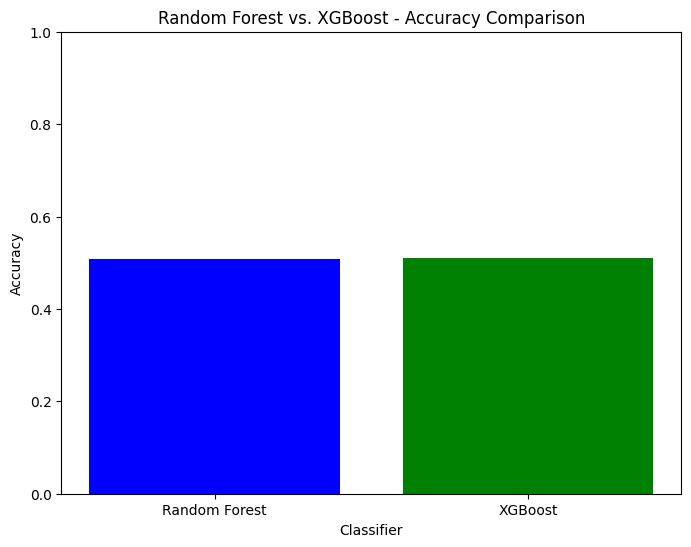

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Sample dataset (replace this with your actual dataset)




# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Customer Type'] = label_encoder.fit_transform(df['Customer Type'])
df['Type of Travel'] = label_encoder.fit_transform(df['Type of Travel'])
df['Class'] = label_encoder.fit_transform(df['Class'])

# Assume 'Age' as feature and 'Gender' as target variable
X = df[['Age', 'Customer Type', 'Type of Travel', 'Class']].values
y = df['Gender'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the models
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Make predictions
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

# Calculate accuracy scores
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Plotting the bar chart
labels = ['Random Forest', 'XGBoost']
accuracy_scores = [rf_accuracy, xgb_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Random Forest vs. XGBoost - Accuracy Comparison')
plt.ylim(0.0, 1.0)  # Set y-axis limits between 0 and 1 for accuracy
plt.show()